This is team submission from:

1. Srichandra Chilappagari email: ch.srichandra@gmail.com

2. Rishubh Khurana email: rishubhkhurana@gmail.com

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os, sys, re
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#External python data




In [ ]:
#f=open('/content/drive/MyDrive/python_valid_0.jsonl','rb')
import pandas as pd
df=pd.read_json('/content/drive/MyDrive/python_valid_0.jsonl',lines=True)

In [ ]:
df.head(1)

,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,partition
0,openai/baselines,baselines/deepq/deepq.py,learn,"def learn(env,\n network,\n ...",python,"def learn(env,\n network,\n ...","[def, learn, (, env, ,, network, ,, seed, =, N...",Train a deepq model.\n\n Parameters\n --...,"[Train, a, deepq, model, .]",3301089b48c42b87b396e246ea3f56fa4bfc9678,https://github.com/openai/baselines/blob/33010...,valid


In [ ]:
df['code'][0]

'def learn(env,\n          network,\n          seed=None,\n          lr=5e-4,\n          total_timesteps=100000,\n          buffer_size=50000,\n          exploration_fraction=0.1,\n          exploration_final_eps=0.02,\n          train_freq=1,\n          batch_size=32,\n          print_freq=100,\n          checkpoint_freq=10000,\n          checkpoint_path=None,\n          learning_starts=1000,\n          gamma=1.0,\n          target_network_update_freq=500,\n          prioritized_replay=False,\n          prioritized_replay_alpha=0.6,\n          prioritized_replay_beta0=0.4,\n          prioritized_replay_beta_iters=None,\n          prioritized_replay_eps=1e-6,\n          param_noise=False,\n          callback=None,\n          load_path=None,\n          **network_kwargs\n            ):\n    """Train a deepq model.\n\n    Parameters\n    -------\n    env: gym.Env\n        environment to train on\n    network: string or a function\n        neural network to use as a q function approximator

In [ ]:
df['code_tokens'][0]

['def',
 'learn',
 '(',
 'env',
 ',',
 'network',
 ',',
 'seed',
 '=',
 'None',
 ',',
 'lr',
 '=',
 '5e-4',
 ',',
 'total_timesteps',
 '=',
 '100000',
 ',',
 'buffer_size',
 '=',
 '50000',
 ',',
 'exploration_fraction',
 '=',
 '0.1',
 ',',
 'exploration_final_eps',
 '=',
 '0.02',
 ',',
 'train_freq',
 '=',
 '1',
 ',',
 'batch_size',
 '=',
 '32',
 ',',
 'print_freq',
 '=',
 '100',
 ',',
 'checkpoint_freq',
 '=',
 '10000',
 ',',
 'checkpoint_path',
 '=',
 'None',
 ',',
 'learning_starts',
 '=',
 '1000',
 ',',
 'gamma',
 '=',
 '1.0',
 ',',
 'target_network_update_freq',
 '=',
 '500',
 ',',
 'prioritized_replay',
 '=',
 'False',
 ',',
 'prioritized_replay_alpha',
 '=',
 '0.6',
 ',',
 'prioritized_replay_beta0',
 '=',
 '0.4',
 ',',
 'prioritized_replay_beta_iters',
 '=',
 'None',
 ',',
 'prioritized_replay_eps',
 '=',
 '1e-6',
 ',',
 'param_noise',
 '=',
 'False',
 ',',
 'callback',
 '=',
 'None',
 ',',
 'load_path',
 '=',
 'None',
 ',',
 '*',
 '*',
 'network_kwargs',
 ')',
 ':',
 '# Create

In [ ]:
import keyword, token, tokenize
import io
master_list=[]
for each in df['code']:
    text = each.expandtabs().strip()
    text = io.StringIO(text)
    cleantokens = []
    for tok in tokenize.generate_tokens(text.readline):
        if len(tok.string)==0 or tok.string=='\n' or tok.type==5:
            cleantokens.append(token.tok_name[tok.type])
        else:
            if  not (('"""' in tok.string) or ('"' in tok.string) or ('#' in tok.string)):
                cleantokens.append(tok.string)
    master_list.append(cleantokens)

In [ ]:
master_list[0]

['def',
 'learn',
 '(',
 'env',
 ',',
 'NL',
 'network',
 ',',
 'NL',
 'seed',
 '=',
 'None',
 ',',
 'NL',
 'lr',
 '=',
 '5e-4',
 ',',
 'NL',
 'total_timesteps',
 '=',
 '100000',
 ',',
 'NL',
 'buffer_size',
 '=',
 '50000',
 ',',
 'NL',
 'exploration_fraction',
 '=',
 '0.1',
 ',',
 'NL',
 'exploration_final_eps',
 '=',
 '0.02',
 ',',
 'NL',
 'train_freq',
 '=',
 '1',
 ',',
 'NL',
 'batch_size',
 '=',
 '32',
 ',',
 'NL',
 'print_freq',
 '=',
 '100',
 ',',
 'NL',
 'checkpoint_freq',
 '=',
 '10000',
 ',',
 'NL',
 'checkpoint_path',
 '=',
 'None',
 ',',
 'NL',
 'learning_starts',
 '=',
 '1000',
 ',',
 'NL',
 'gamma',
 '=',
 '1.0',
 ',',
 'NL',
 'target_network_update_freq',
 '=',
 '500',
 ',',
 'NL',
 'prioritized_replay',
 '=',
 'False',
 ',',
 'NL',
 'prioritized_replay_alpha',
 '=',
 '0.6',
 ',',
 'NL',
 'prioritized_replay_beta0',
 '=',
 '0.4',
 ',',
 'NL',
 'prioritized_replay_beta_iters',
 '=',
 'None',
 ',',
 'NL',
 'prioritized_replay_eps',
 '=',
 '1e-6',
 ',',
 'NL',
 'param_noise

In [ ]:
len(master_list)

23107

# adding capstone python data

In [ ]:
ignore_pattern = re.compile(r'^\s*#+\s*[0-9]*\s*\n|^\s*\n+\s*$|\s*#!.*|^\s*#\s+in\[[0-9]+\]|^\s*#\s+driver')
datapath = Path('/content/drive/MyDrive/NLP/')

In [ ]:
# empty variables to store the english sentences and python codeblocks
english_sents = []
python_codes = []
ignored_lines = []
removed_comments = []
minimum_length = 30
# open the file to read
with open(datapath/'english_python_data_cleaned.txt', 'r') as f:
    # flag to check for the first code block
    start_extraction = False
    python_block = []
    all_lines = f.readlines()
    # remove certain lines from the data set
    clean_lines = []
    for line in all_lines:
        if ignore_pattern.search(line.lower()):
            continue
        elif re.search(r'^\s+#\s*[0-9]*\s*write',line.lower()):
            clean_lines.append(re.sub(r'^\s+#','#',line))
        else:
            clean_lines.append(line)
    
    # walk through each line by line
    for i, line in enumerate(clean_lines):
        if re.search(r'^#.*',line.lower()):
            if len(line)<minimum_length and not re.search(r'^\s*#\s*[0-9]+\s*\w+',line):
                continue
            if len(python_block)>0:
                python_codes.append(''.join(python_block))
            elif start_extraction:
                if re.search(r'write', line.lower()):
                    english_sents[-1]+='\n'
                    english_sents[-1]+=line
                elif len(english_sents[-1])<minimum_length:
                    english_sents[-1]+='\n' 
                    english_sents[-1]+=line
                else:
                    removed_comments.append(line)
                continue
                
            if not start_extraction: 
                start_extraction = True
            english_sents.append(line)
            assert len(english_sents) == len(python_codes)+1,f"{len(english_sents)}, {len(python_codes)}, {english_sents[-1]}"
            python_block = []
        else:
            if not start_extraction:
                continue
            python_block.append(line)
    if len(python_block)>0:
        python_codes.append(''.join(python_block))
assert len(english_sents) == len(python_codes)

In [ ]:
print(f"Number of python programs to learn from --> {len(python_codes)}")
print(f"Number of comments removed --> {len(removed_comments)}")

Number of python programs to learn from --> 4411
Number of comments removed --> 61


In [ ]:
# get rid of comments from python code
python_codes_cleaned = []
for codeblock in python_codes:
    tempblock = []
    for line in codeblock.split('\n'):
        if re.search(r'^\s*#', line):
            continue
        else:
            tempblock.append(line)
    python_codes_cleaned.append('\n'.join(tempblock))

In [ ]:
# take note of how many newlines and spaces are there in every line
# fixing indentation
python_indent_fixed = []
for i,codeblock in enumerate(python_codes_cleaned):
    flag = False
    tempblock = []
    for line in codeblock.split('\n'):
        if re.search(r'^\s+', line):
            span = re.search(r'^\s+', line).span()
            if span[1]%4!=0:
                needed_spaces = int(np.round(span[1]/4.))
                line = ' '+line
                #flag = True
        tempblock.append(line.rstrip())
    if flag:
        print(i)
        print(codeblock)
        print('\n'.join(tempblock))
        break
    python_indent_fixed.append('\n'.join(tempblock))

In [ ]:
python_indent_fixed[0:3]

["num1 = 1.5\nnum2 = 6.3\nsum = num1 + num2\nprint(f'Sum: {sum}')\n",
 'def add_two_numbers(num1, num2):\n    sum = num1 + num2\n    return sum\n',
 "num1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 >= num2) and (num1 >= num3):\n    largest = num1\nelif (num2 >= num1) and (num2 >= num3):\n    largest = num2\nelse:\n    largest = num3\nprint(f'largest:{largest}')\n"]

In [ ]:
import keyword, token, tokenize
import io
for each in python_indent_fixed:
    text = each.expandtabs().strip()
    text = io.StringIO(text)
    cleantokens = []
    for tok in tokenize.generate_tokens(text.readline):
        if len(tok.string)==0 or tok.string=='\n' or tok.type==5:
            cleantokens.append(token.tok_name[tok.type])
        else:
            if  not (('/"/"/"' in tok.string) or ('#' in tok.string)):
                cleantokens.append(tok.string)
    master_list.append(cleantokens)

In [ ]:
len(master_list)

27518

#training glove embeddings

In [ ]:
!pip install glove-python-binary

     |████████████████████████████████| 952kB 9.0MB/s 


In [ ]:
#importing the glove library
from glove import Glove
from glove import Corpus
# creating a corpus object
corpus = Corpus() 
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(master_list, window=10)
#creating a Glove object which

In [ ]:
glove = Glove(no_components=256, learning_rate=0.001)
glove.fit(corpus.matrix, epochs=100, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

Performing 100 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [ ]:
!cp glove.model drive/MyDrive/NLP/EngToPython/

In [ ]:
glove.add_dictionary(corpus.dictionary)

In [ ]:
glove.word_vectors[glove.dictionary['def']]

array([-0.14356829, -0.14460559,  0.14746366, -0.14388056, -0.14598849,
       -0.14755739, -0.15130393,  0.14462048,  0.15077908, -0.14795632,
        0.1413358 ,  0.14452614,  0.14425911, -0.14891594, -0.14741548,
       -0.14167519, -0.15162714, -0.14808479, -0.14939258, -0.14646233,
        0.14883581, -0.14703777, -0.14922137, -0.14861521, -0.14384468,
       -0.15131864, -0.15276887, -0.15012831, -0.14488559, -0.15027657,
       -0.14785471,  0.15207989,  0.14452265, -0.14491683,  0.14478584,
        0.14649573, -0.14863723, -0.15034645,  0.14243769,  0.14385783,
       -0.15090709,  0.14642811,  0.15638676, -0.14811809, -0.15133267,
        0.14563783,  0.14682883,  0.14805534,  0.1459213 ,  0.14643864,
       -0.14309479,  0.14773943, -0.15295576, -0.14408356, -0.14649657,
       -0.14734337, -0.14182818,  0.14403798, -0.14562499, -0.14533694,
       -0.15042209, -0.14170284, -0.14825936,  0.14961076, -0.1498064 ,
        0.1405509 ,  0.14370637,  0.14384289, -0.14747712, -0.14

In [ ]:
from scipy.spatial import distance
sorted(glove.dictionary.keys(), key=lambda word: distance.euclidean(glove.word_vectors[glove.dictionary[word]], glove.word_vectors[glove.dictionary['def']]))[0:20]

['def',
 '%',
 'and',
 'x',
 'else',
 '/',
 'data',
 '**',
 'name',
 'np',
 'len',
 'ENDMARKER',
 'elif',
 '\r\n',
 'is',
 '2',
 'n',
 'path',
 'raise',
 'key']

#Visualizing

In [ ]:
tsne = TSNE(n_components=2, random_state=440)

In [ ]:
words =  list(glove.dictionary.keys())
vectors = [glove.word_vectors[glove.dictionary[word]] for word in words]

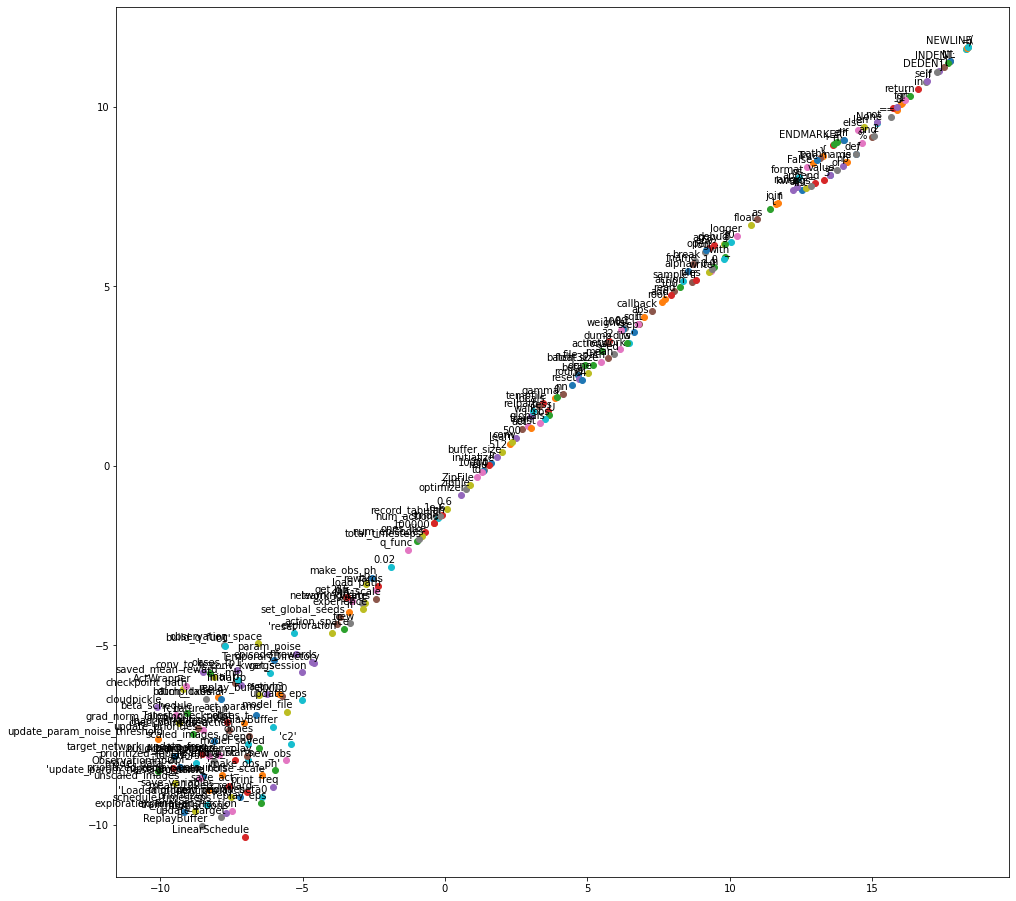

In [ ]:
labels = []
tokens = []

for word in list(glove.dictionary.keys())[:250]:
    tokens.append(glove.word_vectors[glove.dictionary[word]])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()